In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Downloads/Iris.csv')

In [8]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [59]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Histogram

## Histogram - Species

<Axes: xlabel='Species', ylabel='Count'>

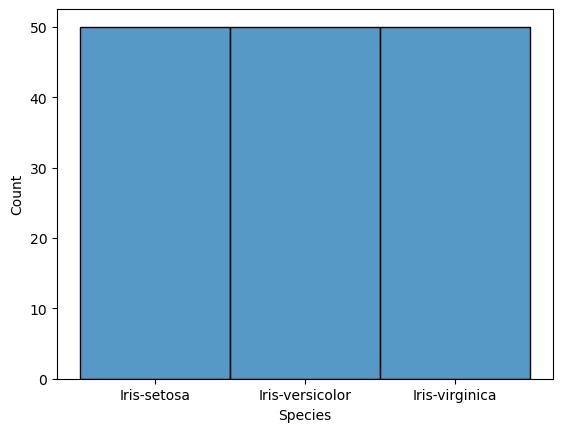

In [15]:
sns.histplot(data=df, x='Species')

## Histogram - SepalLengthCM

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

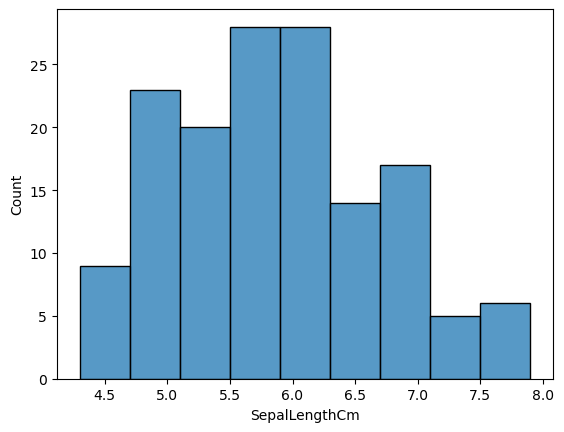

In [58]:
sns.histplot(data=df, x="SepalLengthCm")

## Histogram - SepalWidthCm

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

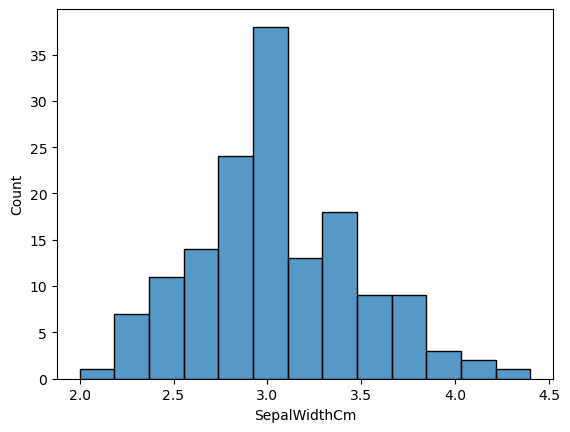

In [17]:
sns.histplot(data=df, x='SepalWidthCm')

## Histogram - PetalLengthCM

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

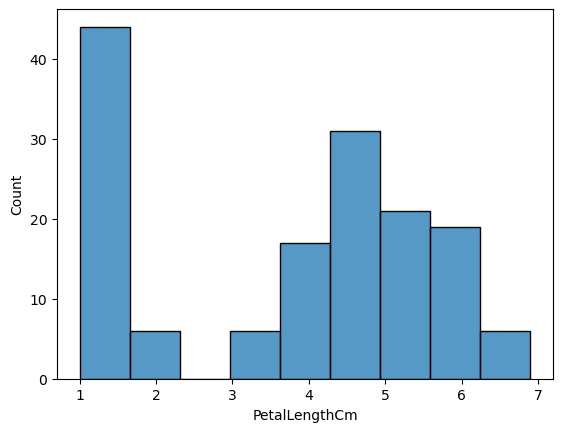

In [21]:
sns.histplot(data=df, x='PetalLengthCm')

## Histogram - PetalWidthCM

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

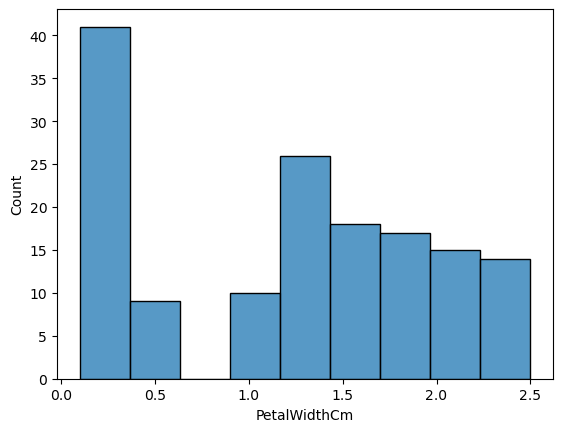

In [23]:
sns.histplot(data=df, x='PetalWidthCm')

# BoxPlot

## SepalLengthCm

<Axes: xlabel='SepalLengthCm'>

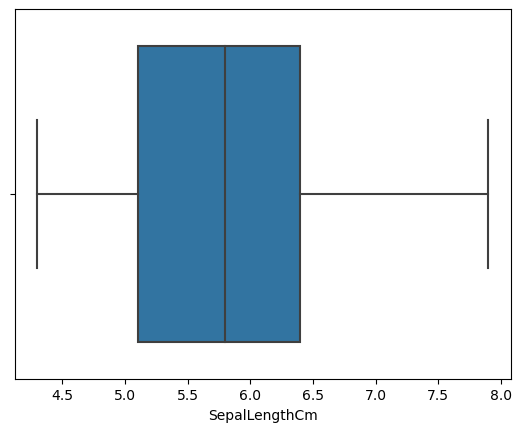

In [29]:
sns.boxplot(x=df['SepalLengthCm'])

## SepalWidthCm   (Outliers)

<Axes: xlabel='SepalWidthCm'>

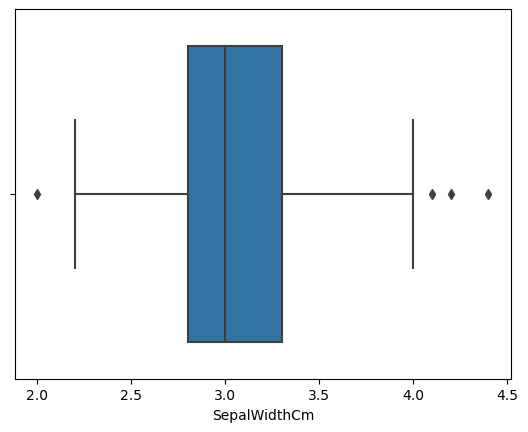

In [28]:
sns.boxplot(x=df['SepalWidthCm'])

## PetalLengthCm

<Axes: xlabel='PetalLengthCm'>

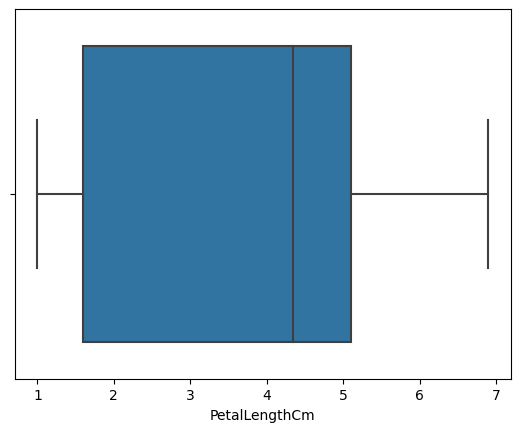

In [30]:
sns.boxplot(x=df['PetalLengthCm'])

## PetalWidthCm

<Axes: xlabel='PetalWidthCm'>

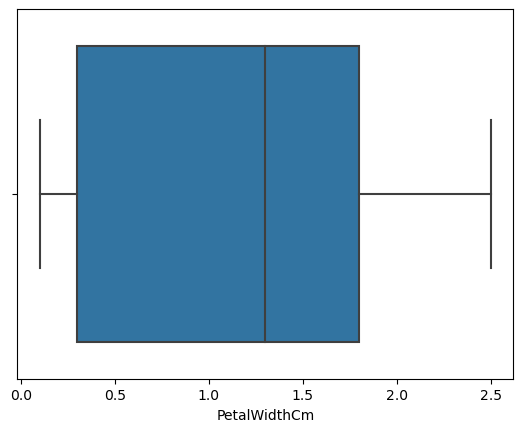

In [31]:
sns.boxplot(x=df['PetalWidthCm'])

In [55]:
data2 = df.iloc[:, 1:]

In [56]:
figure = plt.figure(figsize = (12,8))

<Figure size 1200x800 with 0 Axes>

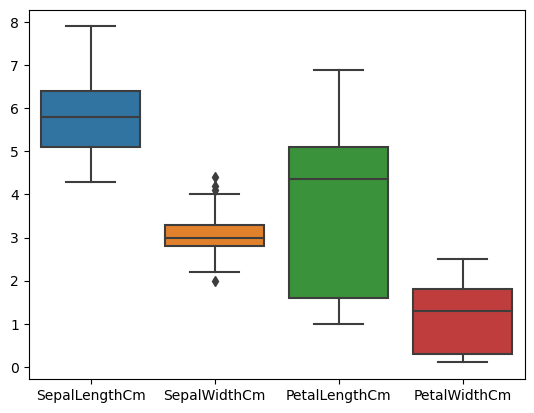

In [57]:
sns.boxplot(data= data2)
plt.show()

## Identifying the outliers

In [49]:
from matplotlib.cbook import boxplot_stats
stats = boxplot_stats(df['SepalWidthCm'])
stats

[{'mean': 3.0540000000000003,
  'iqr': 0.5,
  'cilo': 2.9359050183971735,
  'cihi': 3.0640949816028265,
  'whishi': 4.0,
  'whislo': 2.2,
  'fliers': array([2. , 4.4, 4.1, 4.2]),
  'q1': 2.8,
  'med': 3.0,
  'q3': 3.3}]

In [50]:
outliers = stats[0].get('fliers')

In [51]:
print(outliers)

[2.  4.4 4.1 4.2]


## Removing the outliers

In [32]:
Q1=df['SepalWidthCm'].quantile(0.25)
Q3=df['SepalWidthCm'].quantile(0.75)
Q1,Q3

(2.8, 3.3)

In [33]:
IQR = Q3-Q1

In [34]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [35]:
df[(df['SepalWidthCm']<lower_limit)|(df['SepalWidthCm']>upper_limit)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


In [39]:
df_without_outliers=df[(df['SepalWidthCm']>lower_limit)&(df['SepalWidthCm']<upper_limit)]
df_without_outliers

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='SepalWidthCm'>

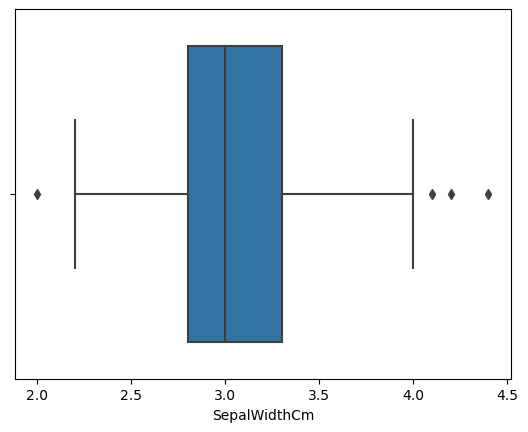

In [40]:
sns.boxplot(x=df['SepalWidthCm'])

<Axes: xlabel='SepalWidthCm'>

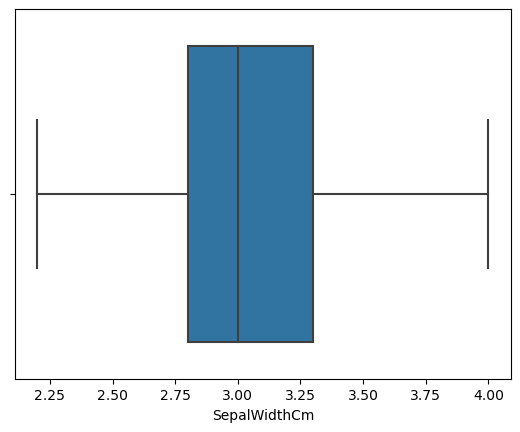

In [37]:
sns.boxplot(x=df_without_outliers['SepalWidthCm'])